In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [20]:
df=pd.read_csv('/content/Titanic-Dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [22]:
df.shape

(891, 12)

##🧹 Step 3: Handle Missing Values

In [23]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [24]:
#replace null values of Age by replacing it by median of it
df['Age'].fillna(df['Age'].median(), inplace=True)
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [25]:
# Fill Embarked with mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [26]:
# Drop Cabin (too many nulls)
df.drop(columns='Cabin', inplace=True)

In [27]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


## Step 4: Encode Categorical Features

In [28]:
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['Embarked'] = le.fit_transform(df['Embarked'])

In [30]:
df.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,2
5,6,0,3,"Moran, Mr. James",1,28.0,0,0,330877,8.4583,1
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,51.8625,2
7,8,0,3,"Palsson, Master. Gosta Leonard",1,2.0,3,1,349909,21.0750,2
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.0,0,2,347742,11.1333,2
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.0,1,0,237736,30.0708,0


 ## Step 5: Normalize Numerical Features

In [33]:
scaler = StandardScaler()
numeric_cols = ['Age', 'Fare']
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

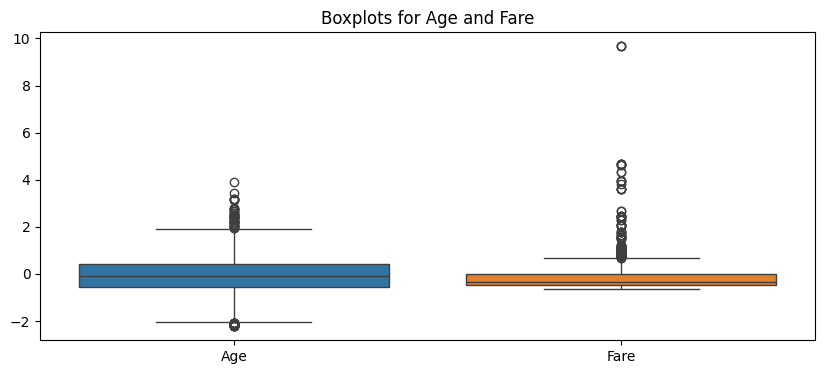

In [40]:
# Boxplot to detect outliers
plt.figure(figsize=(10,4))
sns.boxplot(data=df[['Age', 'Fare']])
plt.title('Boxplots for Age and Fare')
plt.show()

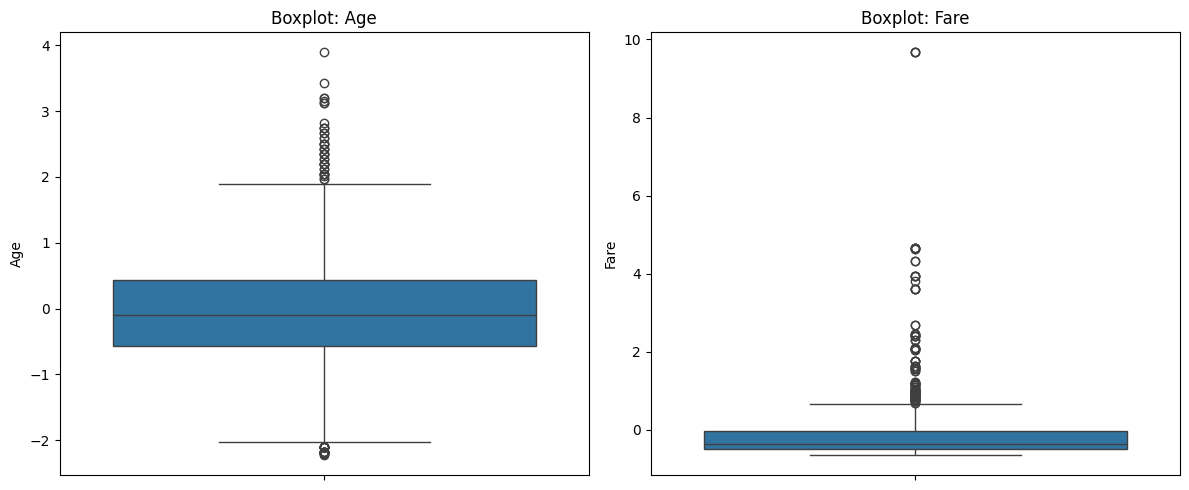

In [42]:
plt.figure(figsize=(12, 5))

# Boxplot for Age
plt.subplot(1, 2, 1)
sns.boxplot(y=df['Age'])
plt.title('Boxplot: Age')

# Boxplot for Fare
plt.subplot(1, 2, 2)
sns.boxplot(y=df['Fare'])
plt.title('Boxplot: Fare')

plt.tight_layout()
plt.show()


In [43]:
# Remove outliers beyond 3 standard deviations
df = df[(np.abs(df['Age']) < 3) & (np.abs(df['Fare']) < 3)]

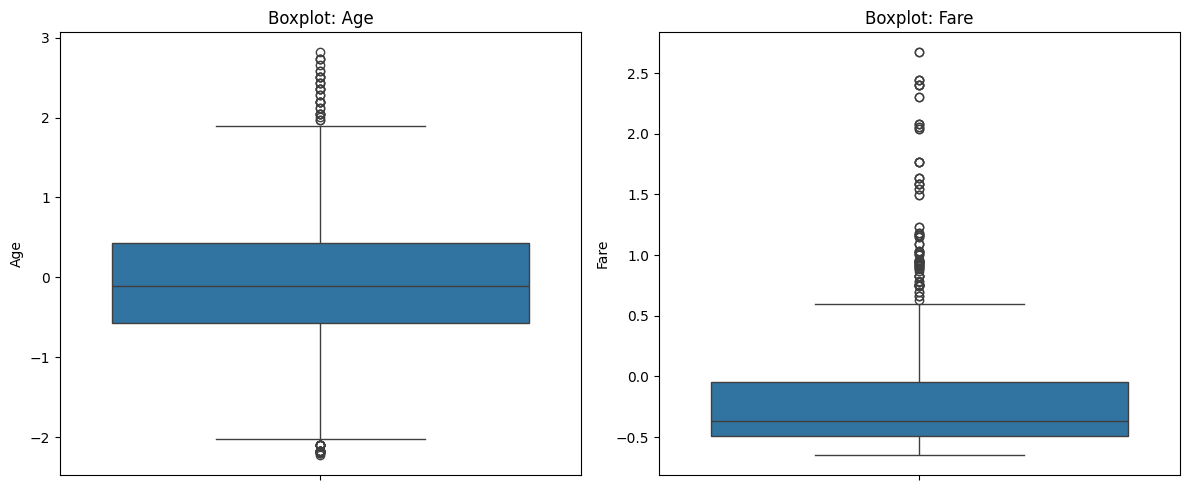

In [45]:
plt.figure(figsize=(12, 5))

# Boxplot for Age
plt.subplot(1, 2, 1)
sns.boxplot(y=df['Age'])
plt.title('Boxplot: Age')

# Boxplot for Fare
plt.subplot(1, 2, 2)
sns.boxplot(y=df['Fare'])
plt.title('Boxplot: Fare')

plt.tight_layout()
plt.show()

In [46]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Log_Fare
0,1,0,3,"Braund, Mr. Owen Harris",1,-0.565736,1,0,A/5 21171,-0.502445,2,-0.698050
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,0.663861,1,0,PC 17599,0.786845,0,0.580452
2,3,1,3,"Heikkinen, Miss. Laina",0,-0.258337,0,0,STON/O2. 3101282,-0.488854,2,-0.671101
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,0.433312,1,0,113803,0.420730,2,0.351171
4,5,0,3,"Allen, Mr. William Henry",1,0.433312,0,0,373450,-0.486337,2,-0.666189


In [49]:
df.drop(columns='Log_Fare', inplace=True)

In [51]:
df.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000
mean,444.748843,0.378472,2.343750,0.650463,-0.029418,0.520833,0.368056,-0.114839,1.555556
std,257.517259,0.485287,0.819028,0.477100,0.960528,1.104937,0.794651,0.591964,0.777235
min,1.000000,0.000000,1.000000,0.000000,-2.224156,0.000000,0.000000,-0.648422,0.000000
25%,221.750000,0.000000,2.000000,0.000000,-0.565736,0.000000,0.000000,-0.489442,1.000000
50%,444.500000,0.000000,3.000000,1.000000,-0.104637,0.000000,0.000000,-0.369347,2.000000
75%,664.250000,1.000000,3.000000,1.000000,0.433312,1.000000,0.000000,-0.048911,2.000000
max,891.000000,1.000000,3.000000,1.000000,2.815657,8.000000,6.000000,2.671118,2.000000


In [52]:
df.to_csv('cleaned_titanic.csv', index=False)